<PIL.TiffImagePlugin.TiffImageFile image mode=I size=2003x2003 at 0x7F7373D56310>
int32
(2003, 2003)


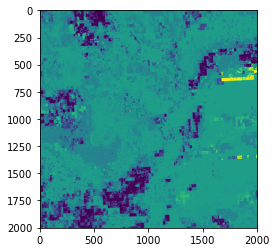

uint8


In [19]:
## code for converting tif int32 to uint8
import numpy as np
from PIL import Image

im = Image.open('/srvgentjkd98p2/U/Suzanna Cuypers/GEE/Pred/exportClassified_Nice_PB_1_test1.tif')
im.show()
print(im)
imarray = np.array(im)#,dtype=np.int32)
print(imarray.dtype) # int32
print(imarray.shape) # (2003, 2003)
imarray = np.uint8(imarray)

result= np.where(imarray==15, 0, imarray) # class 15 will be changed to 0

implot = plt.imshow(imarray)
plt.show()
im = Image.fromarray(imarray)
print(imarray.dtype) # uint8
im.save('./exportClassified_Nice_PB_1_test1_uint8.tif')



<PIL.TiffImagePlugin.TiffImageFile image mode=L size=2003x2003 at 0x7F737230EB50>
(2003, 2003)
uint8


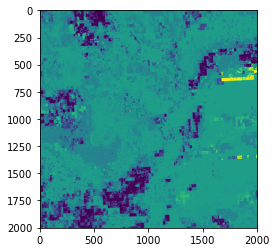

In [20]:
im = Image.open('./exportClassified_Nice_PB_1_test1_uint8.tif')
im.show()
print(im)
imarray = np.array(im)
print(imarray.shape)
im = Image.fromarray(imarray)
print(imarray.dtype)
implot = plt.imshow(imarray)
plt.show()

In [1]:
# create supervised & val list from NSN and Nice 70-30%
import os
import glob
import math
from random import shuffle
import shutil
import random

ORTHO_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/BDORTHO/'
UA_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/'
ORTHO_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/BDORTHO/'
UA_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/UrbanAtlas/'

# split number to training and val (70 - 30)
count_NSN = len(glob.glob1(ORTHO_NSN,"*.tif"))
print(count_NSN)
train_NSN = count_NSN*0.7
train_NSN = int(8*math.floor(train_NSN/8.))
val_NSN = count_NSN - train_NSN
print(train_NSN,val_NSN) # 433, not divisible by 4

count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)
train_Nice = count_Nice*0.7
train_Nice = int(8*math.floor(train_Nice/8.))
val_Nice = count_Nice - train_Nice
print(train_Nice,val_Nice)

train_file = './dataloaders/voc_splits/70_NSN_Nice_8.txt'
val_file = './dataloaders/voc_splits/30_NSN_Nice_8.txt'

counter_NSN = 0
counter_Nice = 0
count_t = 0
count_v = 0
with open(train_file, 'w') as t:
    with open(val_file, 'w') as v:
        for image in os.listdir(ORTHO_NSN):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_NSN+image+' '+UA_NSN+image_UA+'\n'
            if image.endswith(".tif") and counter_NSN < train_NSN:
                counter_NSN += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
        counter = 0
        for image in os.listdir(ORTHO_Nice):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_Nice+image+' '+UA_Nice+image_UA+'\n'
            if image.endswith(".tif") and counter_Nice < train_Nice:
                counter_Nice += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
print(count_t, ' training images')
print(count_v, ' validation images')


433
296 137
333
232 101
528  training images
238  validation images


In [3]:
# create supervised & val list for L4S
import os
import glob
import math
from random import shuffle
import shutil
import random

IMG = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/img/'
#MASK = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/mask/'

# split number to training and val (70 - 30)
count_IMG = len(glob.glob1(IMG,"*.h5"))
print(count_IMG)
train_IMG = count_IMG*0.9
train_IMG = int(8*math.floor(train_IMG/8.))
val_IMG = count_IMG - train_IMG
print(train_IMG,val_IMG) # 433, not divisible by 4

# for the unlabeled data
'''
count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)
train_Nice = count_Nice*0.7
train_Nice = int(8*math.floor(train_Nice/8.))
val_Nice = count_Nice - train_Nice
print(train_Nice,val_Nice)
'''

train_file = './dataloaders/voc_splits/90_labeled_L4S.txt'
val_file = './dataloaders/voc_splits/10_labeled_L4S.txt'

counter_IMG = 0
count_t = 0
count_v = 0
with open(train_file, 'w') as t:
    with open(val_file, 'w') as v:
        for image in os.listdir(IMG):
            #print(image) # image_3052.h5
            image_id = image[5:] #_3052.h5
            if image.endswith(".h5") and counter_IMG < train_IMG:
                counter_IMG += 1
                lijn = 'TrainData/img/image'+image_id+ '\n'
                t.write(lijn)
                count_t += 1
            elif image.endswith(".h5"):
                lijn = 'TrainData/img/image'+image_id+ '\n'
                v.write(lijn)
                count_v += 1
        counter = 0

print(count_t, ' training images')
print(count_v, ' validation images')

3799
3416 383
3416  training images
383  validation images


In [1]:
# Test data of L4S
import os
import glob
import math
from random import shuffle
import shutil
import random

IMG = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/img/'
#MASK = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/mask/'

full_file = './dataloaders/voc_splits/test_L4S.txt'

count = 0
with open(full_file, 'w') as t:
    for image in os.listdir(IMG):
        image_id = image[5:] #_3052.h5
        #lijn_img_ids = 'TrainData/img/image'+image_id+ '\n'
        lijn_img_ids = 'img/image'+image_id+ '\n'
        if image.endswith(".h5"):
            t.write(lijn_img_ids)
            count += 1

print(count, ' images')

800  images


In [2]:
# create full list of L4S
import os
import glob
import math
from random import shuffle
import shutil
import random

#IMG = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/img/'
IMG = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/ValidationData/img/'
#MASK = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/mask/'

full_file = './dataloaders/voc_splits/unlabeled_L4S.txt'

count = 0
with open(full_file, 'w') as t:
    for image in os.listdir(IMG):
        image_id = image[5:] #_3052.h5
        #lijn_img_ids = 'TrainData/img/image'+image_id+ '\n'
        lijn_img_ids = 'ValidationData/img/image'+image_id+ '\n'
        if image.endswith(".h5"):
            t.write(lijn_img_ids)
            count += 1

print(count, ' images')

3799  training images


In [5]:
# create train, val, test data lists L4S
import os
import glob
import math
from random import shuffle
import shutil
import random

IMG = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/img/'
MASK = '/srvgentjkd98p2/K/Projects/Satellite_Photogrammetry/LandSlide/TrainData/mask/'

# split number to training and val (70 - 30)
count_IMG = len(glob.glob1(IMG,"*.h5"))
print(count_IMG)
train_IMG = count_IMG*0.7
train_IMG = int(8*math.floor(train_IMG/8.))
val_IMG = count_IMG - train_IMG
print(train_IMG,val_IMG) # 433, not divisible by 4

# for the unlabeled data
'''
count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)
train_Nice = count_Nice*0.7
train_Nice = int(8*math.floor(train_Nice/8.))
val_Nice = count_Nice - train_Nice
print(train_Nice,val_Nice)
'''

train_file = './dataloaders/voc_splits/70_labeled_L4S.txt'
val_file = './dataloaders/voc_splits/30_labeled_L4S.txt'

counter_IMG = 0
#counter_Nice = 0
count_t = 0
count_v = 0
with open(train_file, 'w') as t:
    with open(val_file, 'w') as v:
        for image in os.listdir(IMG):
            #print(image) # image_3052.h5
            image_id = image[5:] #_3052.h5
            #lijn = IMG+image + ' ' + MASK + 'mask' + image_id + '\n'
            lijn_img_ids = 'TrainData/img/image'+image_id+ '\n'
            if image.endswith(".h5") and counter_IMG < train_IMG:
                counter_IMG += 1
                t.write(lijn_img_ids)
                count_t += 1
            elif image.endswith(".h5"):
                v.write(lijn_img_ids)
                count_v += 1
        counter = 0
'''        for image in os.listdir(ORTHO_Nice):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_Nice+image+' '+UA_Nice+image_UA+'\n'
            if image.endswith(".tif") and counter_Nice < train_Nice:
                counter_Nice += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
'''
print(count_t, ' training images')
print(count_v, ' validation images')

3799
2656 1143
2656  training images
1143  validation images


In [1]:
# create supervised with ALTI
import os
import glob
import math
from random import shuffle
import shutil
import random

ORTHO_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/BDORTHO/'
ALTI_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/RGEALTI/'
UA_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/'
ORTHO_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/BDORTHO/'
ALTI_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/RGEALTI/'
UA_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/UrbanAtlas/'

# split number to training and val (70 - 30)
count_NSN = len(glob.glob1(ORTHO_NSN,"*.tif"))
print(count_NSN)
train_NSN = count_NSN*0.7
train_NSN = int(8*math.floor(train_NSN/8.))
val_NSN = count_NSN - train_NSN
print(train_NSN,val_NSN) # 433, not divisible by 4

count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)
train_Nice = count_Nice*0.7
train_Nice = int(8*math.floor(train_Nice/8.))
val_Nice = count_Nice - train_Nice
print(train_Nice,val_Nice)

train_file = './dataloaders/voc_splits/70_NSN_Nice_alti_8.txt'
val_file = './dataloaders/voc_splits/30_NSN_Nice_alti_8.txt'

counter_NSN = 0
counter_Nice = 0
count_t = 0
count_v = 0
with open(train_file, 'w') as t:
    with open(val_file, 'w') as v:
        for image in os.listdir(ORTHO_NSN):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_NSN+image+' '+ ALTI_NSN + image[0:-4] + '_RGEALTI.tif' + ' '+ UA_NSN+image_UA+'\n'
            if image.endswith(".tif") and counter_NSN < train_NSN:
                counter_NSN += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
        counter = 0
        for image in os.listdir(ORTHO_Nice):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_Nice+image+' '+ ALTI_Nice + image[0:-4] + '_RGEALTI.tif' + ' '+UA_Nice+image_UA+'\n'
            if image.endswith(".tif") and counter_Nice < train_Nice:
                counter_Nice += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
print(count_t, ' training images')
print(count_v, ' validation images')

433
296 137
333
232 101
528  training images
238  validation images


ORIGINAL LABEL VALUES  [0 1 2 5 7] [   2000   93402   99178 1505271 2300149]
NEW LABEL VALUES  [0 1 2 5 7] [   2000   93402   99178 1505271 2300149]


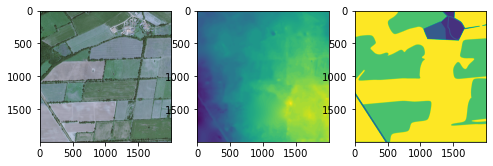

ORIGINAL LABEL VALUES  [ 0  1  2  3  5  7 10 14] [   2000  264132 1138531   93867  164234 1940425  357371   41440]
NEW LABEL VALUES  [ 0  1  2  3  5  7  9 10] [   2000  264132 1138531   93867  164234 1940425   41440  357371]


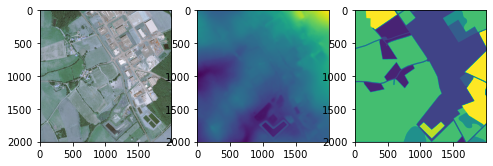

ORIGINAL LABEL VALUES  [ 0  1  2  4  5  7 10 14] [   2000 1024090  844914 1089327  119030   50967   10330  861342]
NEW LABEL VALUES  [ 0  1  2  4  5  7  9 10] [   2000 1024090  844914 1089327  119030   50967  861342   10330]


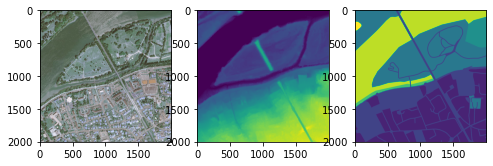

ORIGINAL LABEL VALUES  [0 1 2 3 4] [   2000  963361 2284073   77611  674955]
NEW LABEL VALUES  [0 1 2 3 4] [   2000  963361 2284073   77611  674955]


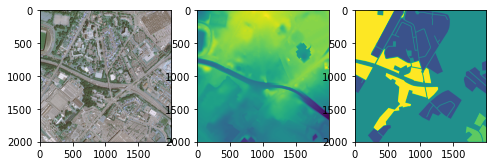

ORIGINAL LABEL VALUES  [ 0  1  2  3  4  5  7 10 14] [   2000 1398542  771017   24947 1039838  183107  227604  282338   72607]
NEW LABEL VALUES  [ 0  1  2  3  4  5  7  9 10] [   2000 1398542  771017   24947 1039838  183107  227604   72607  282338]


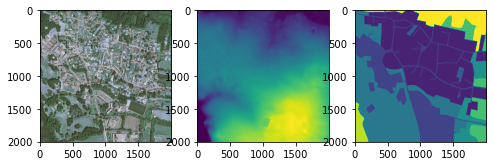

ORIGINAL LABEL VALUES  [ 0  1  2  3  5  7 10 14] [   2000  361597  157358     932  436529 2581240  378676   83668]
NEW LABEL VALUES  [ 0  1  2  3  5  7  9 10] [   2000  361597  157358     932  436529 2581240   83668  378676]


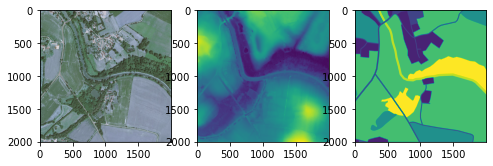

In [47]:
# check image sizes ALTI with cv2
import os
import shutil
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import cv2

### DEM data gives a representation of the bare ground (bare earth) topographic surface of the Earth

train_file = './dataloaders/voc_splits/70_NSN_Nice_alti.txt'
val_file = './dataloaders/voc_splits/30_NSN_Nice_alti.txt'

counter = 0 
with open(val_file, 'r') as f:
    lines = f.read().split('\n')
    #print(lines)

    for element in lines[:6]:
        orig_im, alti, label = element.split()[0],element.split()[1],element.split()[2]
        id_im = orig_im
        # open with PIL = same values
        #alti_I = Image.open(alti)
        # open with cv2
        orig_im, alti, label = cv2.imread(orig_im), cv2.imread(alti,cv2.IMREAD_UNCHANGED),cv2.imread(label,cv2.IMREAD_UNCHANGED)
        #print(type(orig_im),type(alti),type(label)) # <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
        #print(orig_im.shape, alti.shape,label.shape) # (2001, 1999, 3) (1000, 1000) (2001, 1999, 3)
        
        values, counts = np.unique(alti, return_counts=True)
        #print(values, counts)
        #print('alti min value: ',values.min(),'alti max vale: ',values.max()) # -9999 for no data
        
        # labels
        values, counts = np.unique(label, return_counts=True)
        print('ORIGINAL LABEL VALUES ',values, counts)
        
        # remove no data "-9999"
        alti = np.where(alti < -999, 0, alti)
        values, counts = np.unique(alti, return_counts=True)
        #print(values, counts)
        #print('alti min value: ',values.min(),'alti max vale: ',values.max())
        
        imageSize = (orig_im.shape[1],orig_im.shape[0])
        alti_resized = cv2.resize(alti, imageSize) # resize changes the alti values slightly
        values, counts = np.unique(alti_resized, return_counts=True)
        #print(values, counts)
        #print('alti min value: ',values.min(),'alti max vale: ',values.max())
        #print(orig_im.shape, alti_resized.shape,label.shape) # (2001, 1999, 3) (1000, 1000) (2001, 1999, 3)
        
        label = np.where(label == 13, 8, label)
        label = np.where(label == 14, 9, label)
        values, counts = np.unique(label, return_counts=True)
        print('NEW LABEL VALUES ',values, counts)
        
        label = cv2.resize(label, imageSize)
        
        f = plt.figure(figsize=(8, 8))
        f.add_subplot(1,3, 1)
        plt.imshow(orig_im)
        f.add_subplot(1,3, 2)
        plt.imshow(alti_resized)
        f.add_subplot(1,3, 3)
        plt.imshow(label)
        plt.show(block=True)
        
        plt.show(block=True)            



In [1]:
# create supervised with Sentinel-2
import os
import glob
import math
from random import shuffle
import shutil
import random

ORTHO_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/BDORTHO/'
S2_NSN = '/srvgentjkd98p2/K/Projects/IEEE/S2_Tiles/Nantes_Tiles/'
UA_NSN = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/'
ORTHO_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/BDORTHO/'
S2_Nice = '/srvgentjkd98p2/K/Projects/IEEE/S2_Tiles/Nice_Tiles/'
UA_Nice = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/UrbanAtlas/'

# split number to training and val (70 - 30)
count_NSN = len(glob.glob1(ORTHO_NSN,"*.tif"))
print(count_NSN)
train_NSN = count_NSN*0.7
train_NSN = int(4*math.floor(train_NSN/4.))
val_NSN = count_NSN - train_NSN
print(train_NSN,val_NSN) # 433, not divisible by 4

count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)
train_Nice = count_Nice*0.7
train_Nice = int(4*math.floor(train_Nice/4.))
val_Nice = count_Nice - train_Nice
print(train_Nice,val_Nice)

train_file = './dataloaders/voc_splits/70_NSN_Nice_S2.txt'
val_file = './dataloaders/voc_splits/30_NSN_Nice_S2.txt'

counter_NSN = 0
counter_Nice = 0
count_t = 0
count_v = 0
with open(train_file, 'w') as t:
    with open(val_file, 'w') as v:
        for image in os.listdir(ORTHO_NSN):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_NSN+image+' '+ S2_NSN + 'tile_'+ image[0:-4] + '_UA2012.tif' + ' '+ UA_NSN+image_UA+'\n'
            if image.endswith(".tif") and counter_NSN < train_NSN:
                counter_NSN += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
        counter = 0
        for image in os.listdir(ORTHO_Nice):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO_Nice+image+' '+ S2_Nice + 'tile_'+ image[0:-4] + '_UA2012.tif' + ' '+UA_Nice+image_UA+'\n'
            if image.endswith(".tif") and counter_Nice < train_Nice:
                counter_Nice += 1
                t.write(lijn)
                count_t += 1
            elif image.endswith(".tif"):
                v.write(lijn)
                count_v += 1
print(count_t, ' training images')
print(count_v, ' validation images')

433
300 133
333
232 101
532  training images
234  validation images


In [6]:
# create supervised list NSN & Nice 100 %
# supervised and val list are identical, so only one file is made
import os
import glob
import math

IEEE = '/srvgentjkd98p2/K/Projects/IEEE'

ORTHO_NSN = 'labeled_train/Nantes_Saint-Nazaire/BDORTHO/'
UA_NSN = 'labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/'
ORTHO_NSN = os.path.join(IEEE,ORTHO_NSN)
UA_NSN = os.path.join(IEEE,UA_NSN)
count_NSN = len(glob.glob1(ORTHO_NSN,"*.tif"))
print(count_NSN)

ORTHO_Nice = 'labeled_train/Nice/BDORTHO/'
UA_Nice = 'labeled_train/Nice/UrbanAtlas/'
ORTHO_Nice = os.path.join(IEEE,ORTHO_Nice)
UA_Nice = os.path.join(IEEE,UA_Nice)
count_Nice = len(glob.glob1(ORTHO_Nice,"*.tif"))
print(count_Nice)

total = count_NSN+count_Nice
print(total)
total = int(4*math.floor(total/4.)) # number of training data divisible by 4
print(total)

train_file = './dataloaders/voc_splits/100_NSN_Nice.txt'

counter = 0
with open(train_file, 'w') as t:
    for image in os.listdir(ORTHO_NSN):
        image_UA = image[0:-4]+'_UA2012.tif'
        lijn = ORTHO_NSN+image+' '+UA_NSN+image_UA+'\n'
        if image.endswith(".tif") and counter < total:
            counter += 1
            t.write(lijn)
    for image in os.listdir(ORTHO_Nice):
        image_UA = image[0:-4]+'_UA2012.tif'
        lijn = ORTHO_Nice+image+' '+UA_Nice+image_UA+'\n'
        if image.endswith(".tif") and counter < total:
            counter += 1
            t.write(lijn)
print(counter)
        


433
333
766
764
764


In [2]:
# create unsupervised list
# use a UA image from NSN because the script needs to calculate the unsupervised loss etc.
# problem: sizes are not all 2000x2000
# so ignore Lu and m2 (mIoU unlabeled)
import os
import glob
import math

IEEE = '/srvgentjkd98p2/K/Projects/IEEE'

unsup_file = './dataloaders/voc_splits/fakeLabels_train_8.txt'

cities = ['Brest','Caen','Calais_Dunkerque','LeMans','Lorient','Saint-Brieuc']
#cities = ['Calais_Dunkerque']

count_total = 0
for city in cities:
    city_dir = 'unlabeled_train/{}/BDORTHO/'.format(city)
    city_dir = os.path.join(IEEE,city_dir)
    count_city = len(glob.glob1(city_dir,"*.tif"))
    count_total += count_city
print(count_total)
total = int(8*math.floor(count_total/8.)) # number of training data divisible by 4
print(total)

counter = 0
with open(unsup_file, 'w') as u:
    for city in cities:
        ORTHO = 'unlabeled_train/{}/BDORTHO/'.format(city)
        ORTHO = os.path.join(IEEE,ORTHO)
        print(city)
        counter_city = 0
        for image in os.listdir(ORTHO):
            #print(image)
            counter_city +=1
            lijn = ORTHO+image+' /srvgentjkd98p2/K/Projects/IEEE/unlabeled_train/{}/FAKELABELS_GREY/{}.label.png'.format(city,image)+'\n'
            #print(lijn)
            if image.endswith(".tif") and counter < total:
                counter += 1
                u.write(lijn)
        print(counter_city)
        print(counter)

print(counter)

1149
1144
Brest
173
172
Caen
251
423
Calais_Dunkerque
256
679
LeMans
214
893
Lorient
120
1013
Saint-Brieuc
136
1144
1144


In [54]:
# create EXPANDED unsupervised list with alti
import os
import glob
import math

IEEE = '/srvgentjkd98p2/K/Projects/IEEE'

unsup_file = './dataloaders/voc_splits/fakeLabels_train_val_alti_8.txt'

cities = ['Brest','Caen','Calais_Dunkerque','LeMans','Lorient','Saint-Brieuc',]
citiesVal = ['Angers','Cherbourg','Clermont-Ferrand','Lille_Arras_Lens_Douai_Henin','Marseille_Martigues','Quimper','Rennes','Vannes']


count_total = 0
for city in cities:
    print(city)
    city_dir = 'unlabeled_train/{}/BDORTHO/'.format(city)
    city_dir = os.path.join(IEEE,city_dir)
    count_city = len(glob.glob1(city_dir,"*.tif"))
    print(count_city)
    count_total += count_city
for city in citiesVal:
    print(city)
    city_dir = 'val/{}/BDORTHO/'.format(city)
    city_dir = os.path.join(IEEE,city_dir)
    count_city = len(glob.glob1(city_dir,"*.tif"))
    print(count_city)
    count_total += count_city
print(count_total)
total = int(8*math.floor(count_total/8.)) # number of training data divisible by 4
print(total) #3208

counter = 0
with open(unsup_file, 'w') as u:
    for city in cities:
        ORTHO = 'unlabeled_train/{}/BDORTHO/'.format(city)
        ALTI_dir = '/srvgentjkd98p2/K/Projects/IEEE/unlabeled_train/{}/RGEALTI/'.format(city)
        ORTHO = os.path.join(IEEE,ORTHO)
        print(city)
        counter_city = 0
        for image in os.listdir(ORTHO):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO + image+' '+ ALTI_dir + image[0:-4] + '_RGEALTI.tif' + ' /srvgentjkd98p2/K/Projects/IEEE/unlabeled_train/{}/FAKELABELS_GREY/{}.label.png\n'.format(city,image)
            #print(image)
            counter_city +=1
            #print(lijn)
            if image.endswith(".tif") and counter < total:
                counter += 1
                u.write(lijn)
        print(counter_city)
        print(counter)

    for city in citiesVal:
        ORTHO = 'val/{}/BDORTHO/'.format(city)
        ALTI_dir = '/srvgentjkd98p2/K/Projects/IEEE/val/{}/RGEALTI/'.format(city)
        ORTHO = os.path.join(IEEE,ORTHO)
        print(city)
        counter_city = 0
        for image in os.listdir(ORTHO):
            image_UA = image[0:-4]+'_UA2012.tif'
            lijn = ORTHO + image+' '+ ALTI_dir + image[0:-4] + '_RGEALTI.tif' + ' /srvgentjkd98p2/K/Projects/IEEE/val/{}/FAKELABELS_GREY/{}.label.png\n'.format(city,image)
            #print(image)
            counter_city +=1
            #print(lijn)
            if image.endswith(".tif") and counter < total:
                counter += 1
                u.write(lijn)
        print(counter_city)
        print(counter)
        
        
print(counter)

Brest
172
Caen
251
Calais_Dunkerque
256
LeMans
214
Lorient
120
Saint-Brieuc
136
Angers
246
Cherbourg
113
Clermont-Ferrand
300
Lille_Arras_Lens_Douai_Henin
407
Marseille_Martigues
309
Quimper
154
Rennes
391
Vannes
146
3215
3208
Brest
173
172
Caen
251
423
Calais_Dunkerque
256
679
LeMans
214
893
Lorient
120
1013
Saint-Brieuc
136
1149
Angers
246
1395
Cherbourg
113
1508
Clermont-Ferrand
300
1808
Lille_Arras_Lens_Douai_Henin
407
2215
Marseille_Martigues
309
2524
Quimper
154
2678
Rennes
391
3069
Vannes
146
3208
3208


In [10]:
# create expanded unsupervised list from unlabeled_train & val
import os
import glob
import math

IEEE = '/srvgentjkd98p2/K/Projects/IEEE'

unsup_file = './dataloaders/voc_splits/fakeLabels_train_val.txt' # after running, manually add content from fakeLabels_train.txt

cities = ['Angers','Cherbourg','Clermont-Ferrand','Lille_Arras_Lens_Douai_Henin','Marseille_Martigues','Quimper','Rennes','Vannes']


count_total = 0
for city in cities:
    city_dir = 'val/{}/BDORTHO/'.format(city)
    city_dir = os.path.join(IEEE,city_dir)
    count_city = len(glob.glob1(city_dir,"*.tif"))
    count_total += count_city
print(count_total)
total = int(4*math.floor(count_total/4.)) # number of training data divisible by 4
print(total)

counter = 0
with open(unsup_file, 'w') as u:
    for city in cities:
        ORTHO = 'val/{}/BDORTHO/'.format(city)
        ORTHO = os.path.join(IEEE,ORTHO)
        print(city)
        counter_city = 0
        for image in os.listdir(ORTHO):
            #print(image)
            counter_city +=1
            lijn = ORTHO+image+' /srvgentjkd98p2/K/Projects/IEEE/val/{}/FAKELABELS_GREY/{}.label.png'.format(city,image)+'\n'
            #print(lijn)
            if image.endswith(".tif") and counter < total:
                counter += 1
                u.write(lijn)
        print(counter_city)
        print(counter)

print(counter)

2066
2064
Angers
246
246
Cherbourg
113
359
Clermont-Ferrand
300
659
Lille_Arras_Lens_Douai_Henin
407
1066
Marseille_Martigues
309
1375
Quimper
154
1529
Rennes
391
1920
Vannes
146
2064
2064


In [7]:
with open(train_file, 'r') as f:
    print(f.read())

/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0346-6709-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0346-6709-LA93-0M50-E080_UA2012.tif
/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0303-6716-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0303-6716-LA93-0M50-E080_UA2012.tif
/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0358-6694-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0358-6694-LA93-0M50-E080_UA2012.tif
/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0331-6724-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0331-6724-LA93-0M50-E080_UA2012.tif
/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0341-6687-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0341-6687-LA93-0M50-E080_UA2012.tif
/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0320-6677-LA93-0M50-E080.tif /labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/44-2013-0320

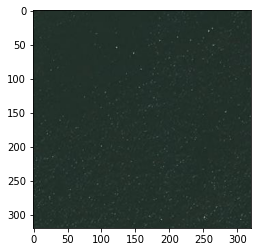

"\nimg = mpimg.imread('../IEEE/44-2013-0280-6703-LA93-0M50-E080.tif')\nimgplot = plt.imshow(img)\nplt.show()\n\n"

In [15]:
# crop images to 320x320
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# original BDORTHO and UrbanAtlas images
train_images = '../IEEE'
train_images_ORTHO = '/labeled_train/Nantes_Saint-Nazaire/BDORTHO/'
train_images_UA = '/labeled_train/Nantes_Saint-Nazaire/UrbanAtlas/'

# cropped images
images_320_ORTHO = '../IEEE/labeled_train_320/Nantes_Saint-Nazaire/BDORTHO/'
images_320_UA = '../IEEE/labeled_train_320/Nantes_Saint-Nazaire/UrbanAtlas/'
if not os.path.exists(images_320_ORTHO):
    os.makedirs(images_320_ORTHO)
if not os.path.exists(images_320_UA):
    os.makedirs(images_320_UA)

# crop upper left corner of every image
box = (0,0,320,320)#(x_offset, Y_offset, width, height)

'''# crop train_images_ORTHO
for image in os.listdir(train_images+train_images_ORTHO):
    f = os.path.join(train_images+train_images_ORTHO, image) # dir/image
    #print(f)
    #print(image)
    if image.endswith(".tif"):
        crop = Image.open(f).crop(box)
        crop.save(images_320_ORTHO+image)
        #print(images_320_ORTHO+image)'''

# crop train_images_UA
for image in os.listdir(train_images+train_images_UA):
    f = os.path.join(train_images+train_images_UA, image) # dir/image
    if image.endswith(".tif"):
        crop = Image.open(f).crop(box)
        crop.save(images_320_UA+image)
        
image = '44-2013-0280-6703-LA93-0M50-E080.tif'
img = mpimg.imread(images_320_ORTHO+image)
imgplot = plt.imshow(img)
plt.show()


'''
img = mpimg.imread('../IEEE/44-2013-0280-6703-LA93-0M50-E080.tif')
imgplot = plt.imshow(img)
plt.show()

'''

In [1]:
# check produced outputs
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# legend
keys = list(range(0,16))
values = ['No information', 'Urban fabric', 'Industrial, commercial, public, military, private and transport units','Mine, dump and construction sites','Artificial non-agricultural vegetated areas','Arable land (annual crops)','Permanent crops','Pastures','Complex and mixed cultivation patterns','Orchards at the fringe of urban classes','Forests','Herbaceous vegetation associations','Open spaces with little or no vegetation','Wetlands','Water','Clouds and shadows']
legend = {keys[i]: values[i] for i in range(len(keys))}
#print(legend)

orig_images = '/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nice/BDORTHO/'
pred_dir = './outputs/CCT_70_30_Nice_NsN/'
number = 0
for image in os.listdir(pred_dir):
    pred_im = os.path.join(pred_dir,image)
    im = Image.open(pred_im)
    if image.endswith('.png') and os.path.getsize(pred_im) > 0 and number < 5:
        number += 1
        pred_im = mpimg.imread(pred_im)
        orig_im = os.path.join(orig_images, image[:-4]+'.tif') # dir/image
        print(image)
        orig_im = mpimg.imread(orig_im)
        # get unique values
        pix_val = set(list(im.getdata()))
        for i in pix_val:
            print(i, ': ',legend[i])

        
        f = plt.figure(figsize=(10, 10))
        f.add_subplot(1,2, 1)
        plt.imshow(orig_im)
        f.add_subplot(1,2, 2)
        plt.imshow(pred_im)
        plt.show(block=True)
        


FileNotFoundError: [Errno 2] No such file or directory: './outputs/CCT_70_30_Nice_NsN/'

49-2013-0424-6704-LA93-0M50-E080_prediction.tif
0 :  No information
1 :  Urban fabric
2 :  Industrial, commercial, public, military, private and transport units
5 :  Arable land (annual crops)
7 :  Pastures
10 :  Forests


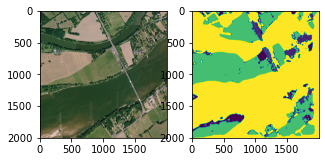

49-2013-0455-6710-LA93-0M50-E080_prediction.tif
0 :  No information
1 :  Urban fabric
2 :  Industrial, commercial, public, military, private and transport units
5 :  Arable land (annual crops)
7 :  Pastures
10 :  Forests
12 :  Open spaces with little or no vegetation


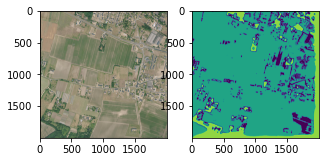

49-2013-0435-6700-LA93-0M50-E080_prediction.tif
0 :  No information
1 :  Urban fabric
2 :  Industrial, commercial, public, military, private and transport units
5 :  Arable land (annual crops)
7 :  Pastures
10 :  Forests
12 :  Open spaces with little or no vegetation


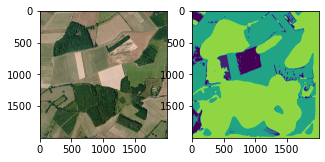

49-2013-0441-6692-LA93-0M50-E080_prediction.tif
0 :  No information
1 :  Urban fabric
2 :  Industrial, commercial, public, military, private and transport units
5 :  Arable land (annual crops)
7 :  Pastures
10 :  Forests
12 :  Open spaces with little or no vegetation


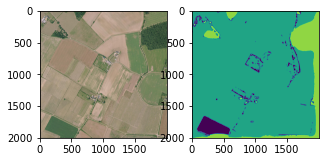

Time elapsed (hh:mm:ss.ms) 0:00:03.577150


In [2]:
# check produced outputs for val images

# --output '/geomatics/gpuserver-0/scuypers/CCT_output/FL_70_30/unlabeled_train/Brest/' 
#--images '/srvgentjkd98p2/K/Projects/IEEE/unlabeled_train/Brest/BDORTHO'
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from datetime import datetime

start_time = datetime.now()

# legend
keys = list(range(0,16))
values = ['No information', 'Urban fabric', 'Industrial, commercial, public, military, private and transport units','Mine, dump and construction sites','Artificial non-agricultural vegetated areas','Arable land (annual crops)','Permanent crops','Pastures','Complex and mixed cultivation patterns','Orchards at the fringe of urban classes','Forests','Herbaceous vegetation associations','Open spaces with little or no vegetation','Wetlands','Water','Clouds and shadows']
legend = {keys[i]: values[i] for i in range(len(keys))}
#print(legend)
model = 'ABCE_70_30_unsup'
city = 'Angers'
orig_images = '/srvgentjkd98p2/K/Projects/IEEE/val/{}/BDORTHO'.format(city)
pred_dir = '/geomatics/gpuserver-0/scuypers/CCT_output/{}/val/{}/'.format(model,city)
pred_dir = '/geomatics/gpuserver-0/scuypers/DFCoutputs/{}/'.format(city)
number = 0
for image in os.listdir(pred_dir):
    pred_im = os.path.join(pred_dir,image)
    im = Image.open(pred_im)
    if image.endswith('prediction.tif') and os.path.getsize(pred_im) > 0 and number < 4:
        number += 1
        pred_im = mpimg.imread(pred_im)
        orig_im = os.path.join(orig_images, image[:-15]+'.tif') # dir/image
        print(image)
        orig_im = mpimg.imread(orig_im)
        # get unique values
        pix_val = set(list(im.getdata()))
        for i in pix_val:
            print(i, ': ',legend[i])

        
        f = plt.figure(figsize=(5, 5))
        f.add_subplot(1,2, 1)
        plt.imshow(orig_im)
        f.add_subplot(1,2, 2)
        plt.imshow(pred_im)
        plt.show(block=True)




time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

In [2]:
import open3d as o3d
# combine RGB and D into RGBD
color_raw = o3d.io.read_image("/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/BDORTHO/44-2013-0280-6703-LA93-0M50-E080.tif ")
depth_raw = o3d.io.read_image("/srvgentjkd98p2/K/Projects/IEEE/labeled_train/Nantes_Saint-Nazaire/RGEALTI/44-2013-0280-6703-LA93-0M50-E080.tif ")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

[Open3D WARNING] Read geometry::Image failed: file extension tif  unknown
[Open3D WARNING] Read geometry::Image failed: file extension tif  unknown
RGBDImage of size 
Color image : 0x0, with 0 channels.
Depth image : 0x0, with 0 channels.
Use numpy.asarray to access buffer data.


49-2013-0395-6720-LA93-0M50-E080.tif


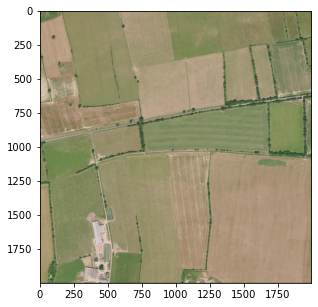

49-2013-0395-6726-LA93-0M50-E080.tif


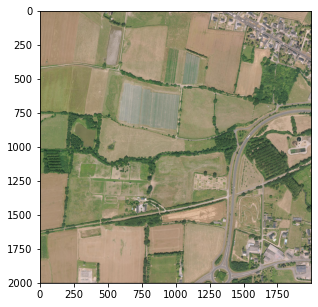

49-2013-0396-6721-LA93-0M50-E080.tif


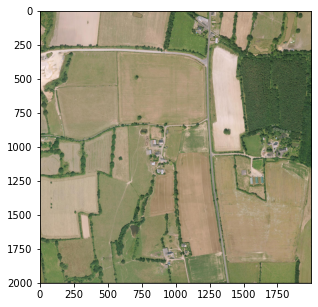

49-2013-0398-6718-LA93-0M50-E080.tif


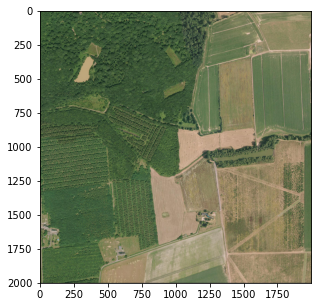

49-2013-0399-6723-LA93-0M50-E080.tif


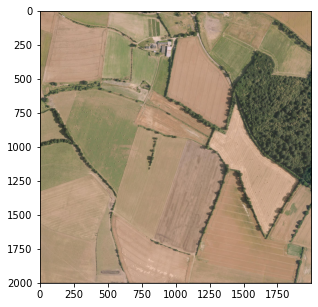

49-2013-0399-6730-LA93-0M50-E080.tif


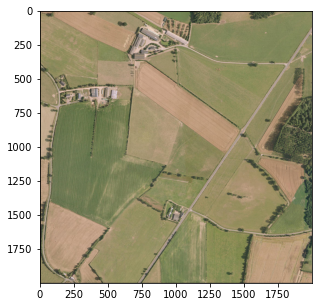

49-2013-0401-6718-LA93-0M50-E080.tif


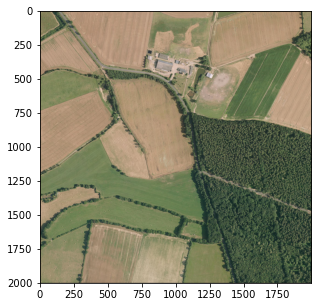

49-2013-0402-6706-LA93-0M50-E080.tif


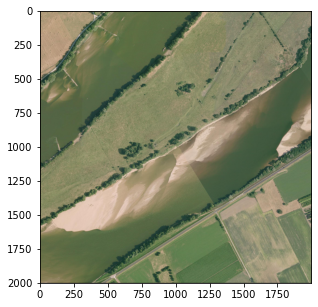

49-2013-0402-6714-LA93-0M50-E080.tif


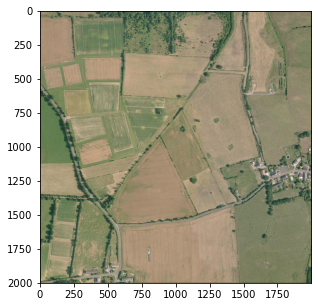

49-2013-0402-6719-LA93-0M50-E080.tif


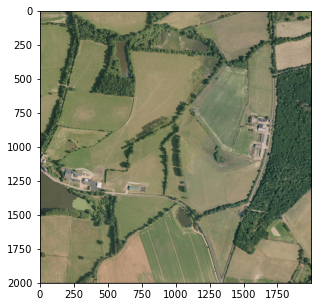

Time elapsed (hh:mm:ss.ms) 0:00:09.360811


In [9]:
# show S-2 images

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

im_dir = '/srvgentjkd98p2/K/Projects/IEEE/S2_Tiles/Nice_Tiles' # can't visualize because 8 bands!
im_dir = '/srvgentjkd98p2/K/Projects/IEEE/val/Angers/BDORTHO'
number = 0
for image in os.listdir(im_dir):
    orig_im = os.path.join(im_dir,image)
    im = Image.open(orig_im)
    if image.endswith('.tif') and number < 10:
        number += 1
        orig_im = mpimg.imread(orig_im)
        print(image)

        f = plt.figure(figsize=(5, 5))
        plt.imshow(orig_im)
        plt.show(block=True)

